# <center> Desafío - Estimando curvas normales
## <center> Jose Gomez

## 1. Importe un csv desde internet
Utilice la base de datos de un compañero creada en la sesión pasada.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_luis = pd.read_csv("subsample_LAPP_demo.csv")
df_luis.columns

Index(['Unnamed: 0', 'undp_hdi', 'ccodealp', 'ht_region', 'gle_cgdpc',
       'imf_pop', 'wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph'],
      dtype='object')

## 2. Importe su conjunto de funciones
Genere un archivo ancilliary_funcs.py para guardar las funciones creadas en la sesión
pasada e impórtelo.
Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra de
su compañero.

In [2]:
from ancilliary_funcs import desafio_2
from ancilliary_funcs import grafica_hist
from ancilliary_funcs import graficar_dotplot
from ancilliary_funcs import obs_perdidas 

#grafica_hist(df_luis,'undp_hdi',True,True) 
obs_perdidas(df_luis,'undp_hdi') # Cantidad de datos perdidos y el % respecto al total 
## (4, 4.12)

cantidad_datos_perdidos = []
for i,columna in enumerate(df_luis):
    if i > 0:
        cantidad_datos_perdidos.append(columna)
        cantidad_datos_perdidos.append(obs_perdidas(df_luis,columna))
print(cantidad_datos_perdidos)

['undp_hdi', (4, 4.12), 'ccodealp', (0, 0.0), 'ht_region', (0, 0.0), 'gle_cgdpc', (0, 0.0), 'imf_pop', (23, 23.71), 'wef_imort', (18, 18.56), 'who_alc2000', (4, 4.12), 'who_tobt', (31, 31.96), 'wdi_exph', (1, 1.03)]


### Las columnas numéricas y con menor cantidad de datos perdidos son: undp_hdi , gle_cgdpc , wdi_exph

In [3]:
columnas_menos_na = ['undp_hdi' , 'gle_cgdpc' , 'wdi_exph']

## 3. Estime el puntaje Z
Estime el puntaze Z para las 10 primeras y últimas observaciones de las variables con una menor
cantidad de datos perdidos

In [4]:
def get_z_score(dataframe, cols):
    """
    Esta funcion retorna un sub dataframe de "dataframe" el cual contiene los z-scores de [cols]
    """
    df_z_scores = pd.DataFrame()
    for i in cols:
        droped_na = dataframe[i].dropna()
        mean_drop = droped_na.mean()
        std_drop = droped_na.std()
        z_score = droped_na - mean_drop / std_drop
        
        df_z_scores[f'{i}_zcore'] = z_score
    return df_z_scores

In [5]:
# Concateno el dataframe de Luis con el dataframe retornado por la función "get_z_score"
df_luis_full = pd.concat([df_luis, get_z_score(df_luis,columnas_menos_na)],axis=1)

In [6]:
sorted_luis_full = df_luis_full.dropna().sort_values(by=['undp_hdi_zcore','gle_cgdpc_zcore','wdi_exph_zcore'])

###### Z-Score de los primeros 10 resgistros

### Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué características en común se encuentran?



In [7]:
sorted_luis_full.head(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,undp_hdi_zcore,gle_cgdpc_zcore,wdi_exph_zcore
66,187,0.399,BFA,SubSaharian,1095.96000,16.500000,65.800003,4.64,19.100000,4.960263,-3.995404,1095.18592,2.467680
35,116,0.414,MOZ,SubSaharian,852.39001,25.733000,63.099998,1.16,18.799999,6.975582,-3.980404,851.61593,4.482998
14,106,0.438,MLI,SubSaharian,1063.26000,14.854000,79.599998,0.61,18.600000,6.862166,-3.956404,1062.48592,4.369583
42,54,0.441,ETH,SubSaharian,900.77002,88.347000,46.500000,1.86,4.700000,4.884313,-3.953404,899.99594,2.391729
53,108,0.513,MRT,SubSaharian,2223.01000,3.369000,64.800003,0.01,22.299999,3.772699,-3.881404,2222.23592,1.280115
76,185,0.519,TZA,SubSaharian,1416.30000,43.880001,37.700001,4.20,16.299999,5.580116,-3.875404,1415.52592,3.087532
4,88,0.550,KEN,SubSaharian,1494.63000,40.700001,48.700001,1.84,13.600000,5.720291,-3.844404,1493.85592,3.227707
15,25,0.552,MMR,SouthEastAsia,5733.37010,51.418999,41.099998,0.70,20.000000,2.275755,-3.842404,5732.59602,-0.216829
58,120,0.555,NPL,SouthAsia,1462.08000,28.174999,33.599998,0.27,24.600000,5.797226,-3.839404,1461.30592,3.304642
26,28,0.558,KHM,SouthEastAsia,1927.06010,14.605000,33.900002,2.12,23.000000,5.675639,-3.836404,1926.28602,3.183055


In [8]:
sorted_luis_full['undp_hdi_zcore'].mean() # -3.6524598322441455
sorted_luis_full['gle_cgdpc_zcore'].mean() # 16868.418902418955
sorted_luis_full['wdi_exph_zcore'].mean() # 4.236627073655809

4.236627073655809

###### Z-Score de los primeros 10 resgistros

In [9]:
sorted_luis_full.tail(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,undp_hdi_zcore,gle_cgdpc_zcore,wdi_exph_zcore
82,101,0.896,LUX,WesternDem,61404.480,0.550000,1.7,11.12,24.400000,6.937873,-3.498404,61403.70592,4.445290
83,81,0.898,ISR,NorthAfrica,25926.250,8.212000,3.3,2.62,30.400000,7.808308,-3.496404,25925.47592,5.315724
91,85,0.902,JPN,EastAsia,36123.770,127.120003,2.2,7.55,22.799999,10.228745,-3.492404,36122.99592,7.736161
3,123,0.913,NZL,WesternDem,26481.369,4.555000,4.7,9.07,17.600000,11.029610,-3.481404,26480.59492,8.537026
34,80,0.920,IRL,WesternDem,46422.070,4.621000,3.4,10.75,23.200001,7.783196,-3.474404,46421.29592,5.290613
11,121,0.923,NLD,WesternDem,42258.352,16.865000,3.4,8.68,25.700001,10.897293,-3.471404,42257.57792,8.404709
88,64,0.924,DEU,WesternDem,39486.699,80.983002,3.4,11.03,30.700001,11.297001,-3.470404,39485.92492,8.804417
5,155,0.924,SGP,SouthEastAsia,54268.148,5.470000,2.3,1.83,16.200001,4.922792,-3.470404,54267.37392,2.430208
16,8,0.937,AUS,WesternDem,38611.949,23.621000,4.1,9.71,16.000000,9.422300,-3.457404,38611.17492,6.929717
49,127,0.948,NOR,WesternDem,57634.770,5.156000,2.2,6.06,24.100000,9.719718,-3.446404,57633.99592,7.227134


In [10]:
sorted_luis_full['ht_region'].value_counts()

EastEurope       14
WesternDem        9
SubSaharian       9
NorthAfrica       8
SouthEastAsia     6
LatAm             3
SouthAsia         3
Caribbean         1
EastAsia          1
Name: ht_region, dtype: int64

## 4. Estime el puntaje z de las regiones

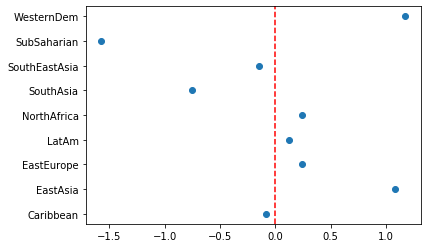

In [11]:
graficar_dotplot(sorted_luis_full,'undp_hdi_zcore','ht_region',False,'zscore')

## 5. Genere un método que devuelva un gráfico comparando dos curvas de densidad

In [47]:

mi_df = pd.read_csv('subsample_JFGP_demo.csv')
print(mi_df['undp_hdi'].head())
print(df_luis['undp_hdi'].head())

0    0.923
1      NaN
2    0.790
3    0.924
4      NaN
Name: undp_hdi, dtype: float64
0    0.515
1    0.769
2    0.394
3    0.913
4    0.550
Name: undp_hdi, dtype: float64


<font color=blue>El __método__ debe contener los siguientes argumentos</font>:<br>
df1 : Tabla de datos 1.<br>
df2 : Tabla de datos 2.<br>
variable : Variable a contrastar.<br>
log : Booleano. Si es True transformar la variable al logaritmo. Por defecto debe ser
False .<br>
Grafique las curvas para <font color=green>__imf_pop__</font> , <font color=gold>__gle_cgdpc__</font> y <font color=red>__undp_hdi__</font> . 

In [86]:
from scipy import stats
def desafio5(df1,df2,variable,log=False):   
    if log:
        var1 = np.log(df1[variable].dropna())
        var2 = np.log(df2[variable].dropna())
    else:
        var1 = df1[variable].dropna()
        var2 = df2[variable].dropna()
        
    #x_min, x_max = plt.xlim()
    x_axis = np.linspace(0, var1.max(), 100)        
    plt.plot(x_axis, stats.norm.pdf(x_axis,var1.mean(),var1.std()),color='tomato', lw=3)

    x_min2, x_max2 = plt.xlim()
    x_axis2 = np.linspace(0, var2.max(), 100)
    plt.plot(x_axis2, stats.norm.pdf(x_axis2,var2.mean(),var2.std()),color='black', lw=3)

    

#### Curva para <font color=red> undp_hdi </font>

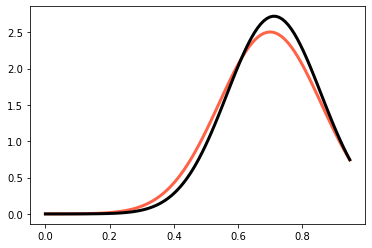

In [91]:
desafio5(df_luis,mi_df,'undp_hdi',False)

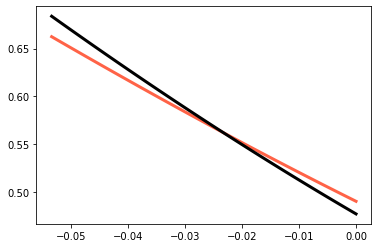

In [92]:
desafio5(df_luis,mi_df,'undp_hdi',True)

#### Curva para <font color=red> gle_cgdpc </font>

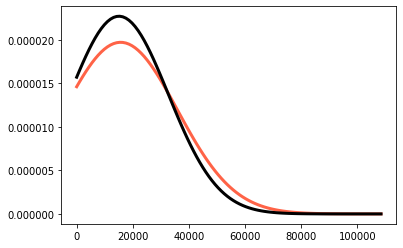

In [93]:
desafio5(df_luis,mi_df,'gle_cgdpc',False)

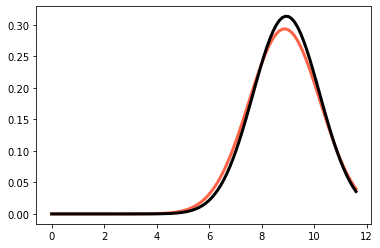

In [94]:
desafio5(df_luis,mi_df,'gle_cgdpc',True)

#### Curva para <font color=red> imf_pop </font>

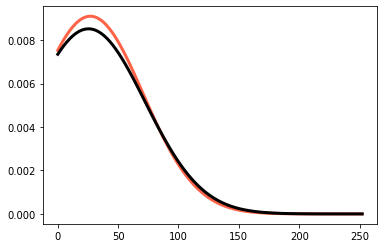

In [97]:
desafio5(df_luis,mi_df,'imf_pop',False)

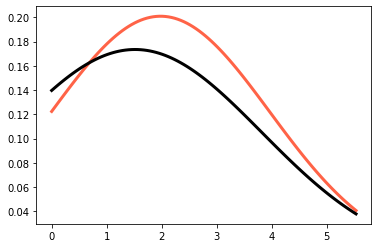

In [98]:
desafio5(df_luis,mi_df,'imf_pop',True)

### ¿En qué casos es necesario utilizar logaritmos? ¿Por qué?
En el caso de undp_hdi __NO__ es necesario aplicar logaritmo porque su distribución es normal, a diferencia de imf_pop y gle_cgdpc donde __SI__ es necesario 